First, we load the channels from Logdata. I picked these channels inspired by an Interview question I got at VCARB and only omitted the vertical accelerations because my team's models do not account for elevation changes yet.

Load MDF into Notebook

In [30]:
from asammdf import MDF
import numpy as np
import pandas as pd
from scipy.signal import savgol_filter
from pathlib import Path

mdf_path = Path.cwd().parent / "data" / "AutoXFSG23" / "DataF009_2023-08-19_18-03-59.mdf"
#print("Resolved:", mdf_path)
#print("Exists:", mdf_path.exists())

mdf = MDF(mdf_path)
CH = {
    "long_acc":              "ACCEL_X",              # longitudinal acceleration [m/s²]
    "lat_acc":               "ACCEL_Y",              # lateral acceleration [m/s²]
    "brake_pressure":        "PB_Brakeforce",        # braking force [% or N]
    "throttle_pedal":        "PB_Torque",            # engine torque or pedal proxy
    "car_speed":             "v_abs",                # absolute vehicle speed [m/s or km/h]
    "steering_wheel_angle":  "ECU_F_SteeringAngle",  # steering wheel angle [deg]
    "yaw_rate":              "yawrate",              # yaw rate [deg/s or rad/s]
    "pitch_rate":            "PITCH_ACC",            # pitch angular acceleration [deg/s²]
}



We do a quick sanity check on the channels

ACCEL_X                    samples=178477  nonzero=177634  min=   -28.340  max=    34.610


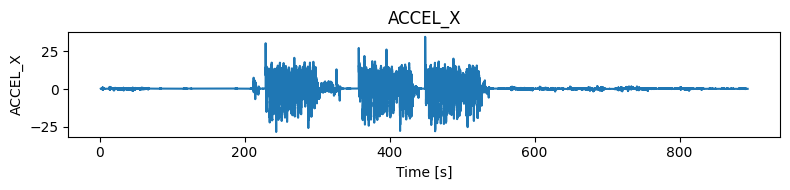

ACCEL_Y                    samples=178477  nonzero=151544  min=   -38.010  max=    34.640


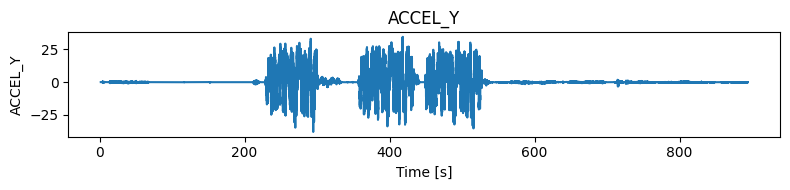

PB_Brakeforce              samples= 89302  nonzero=  9813  min=     0.000  max=  1023.000


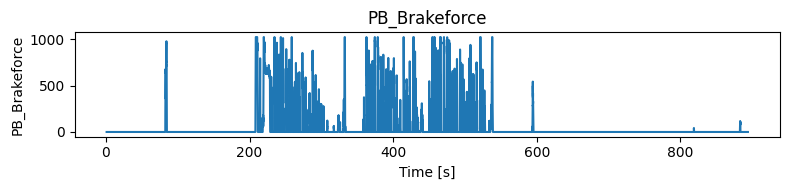

PB_Torque                  samples= 89302  nonzero= 42895  min=     0.000  max=    98.400


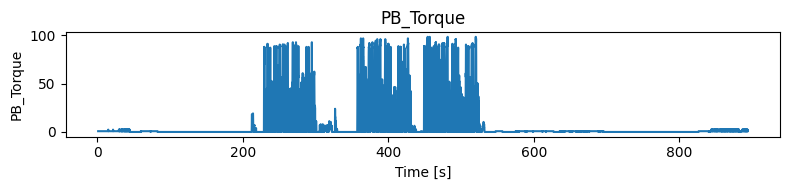

v_abs                      samples=178570  nonzero=140993  min=     0.000  max=    29.442


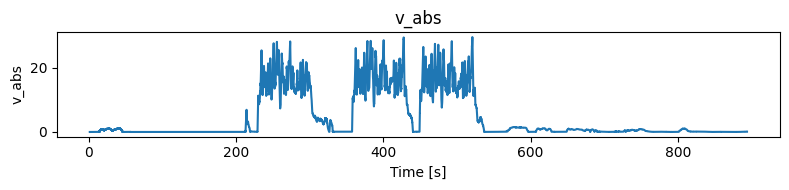

ECU_F_SteeringAngle        samples=178605  nonzero=177360  min=  -127.000  max=   127.000


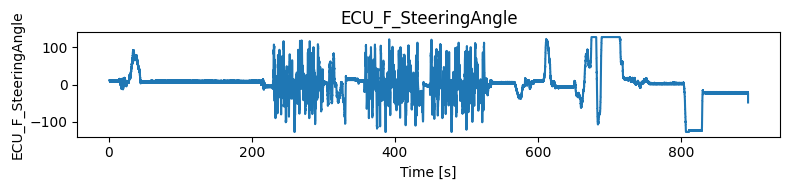

yawrate                    samples=178570  nonzero= 83620  min=    -2.570  max=     2.230


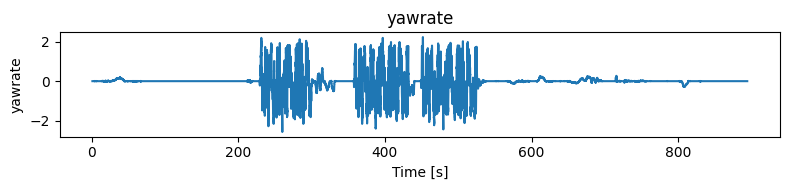

PITCH_ACC                  samples=  8925  nonzero=  8925  min=     0.001  max=     0.229


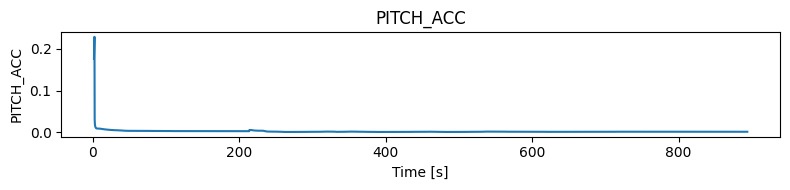

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def pull(mdf, ch):
    s = mdf.get(ch)
    return pd.DataFrame({"time_s": s.timestamps, "value": s.samples})

for key, ch in CH.items():
    sig = pull(mdf, ch)
    nz = int((sig["value"] != 0).sum())
    print(f"{ch:25s}  samples={len(sig):6d}  nonzero={nz:6d}  min={sig['value'].min():10.3f}  max={sig['value'].max():10.3f}")
    
    plt.figure(figsize=(8,2))
    plt.plot(sig["time_s"], sig["value"])
    plt.title(f"{ch}")
    plt.xlabel("Time [s]")
    plt.ylabel(ch)
    plt.tight_layout()
    plt.show()


Now we Align the data

In [ ]:
#todo